In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Suicide_rates.csv to Suicide_rates.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('Suicide_rates.csv')

display(df)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [ ]:
# Dropping the country-year column
del df['country-year']

# Changing all column names to remove unnecessary spaces in them
df.rename(columns = lambda x: x.strip(), inplace = True)

# Removing commas in GDP per year values of all records
df['gdp_for_year ($)'] = df['gdp_for_year ($)'].str.replace(',', '').astype(float)

df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
HDI for year          float64
gdp_for_year ($)      float64
gdp_per_capita ($)      int64
generation             object
dtype: object

In [ ]:
# Getting the list of unique countries
country_list = pd.unique(df['country'])

# Grouping the total number of suicides per year by country
df_grouped = df.groupby(['country', 'year'])['suicides_no'].sum().reset_index(name ='suicides')

# Further grouping the total number of suicides summing over the years by country
df_year_grouped = df.groupby(['country'])['suicides_no'].sum().reset_index(name ='avg_yearly_suicides')

# Averaging the number of suicides over the years
df_year_grouped['avg_yearly_suicides'] = df_year_grouped['avg_yearly_suicides']/len(df_grouped['year'])

# Sorting the average number of suicides from highest to lowest
df_year_grouped = df_year_grouped.sort_values(by = 'avg_yearly_suicides', ascending = False)

print("Top 6 countries by average yearly suicides are:\n")
print(df_year_grouped[0:6])

Top 6 countries by average yearly suicides are:

               country  avg_yearly_suicides
75  Russian Federation           521.215855
98       United States           445.503231
46               Japan           347.652736
33              France           141.803964
95             Ukraine           137.850065
35             Germany           125.489875


                country          age  suicides_by_age
449  Russian Federation  15-24 years           148611
450  Russian Federation  25-34 years           231187
451  Russian Federation  35-54 years           479140
452  Russian Federation   5-14 years             8840
453  Russian Federation  55-74 years           267753
454  Russian Federation    75+ years            74211 



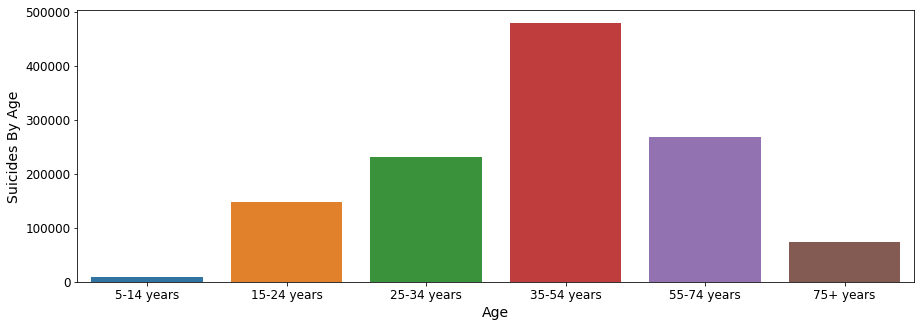

--------------
           country          age  suicides_by_age
587  United States  15-24 years           141679
588  United States  25-34 years           182047
589  United States  35-54 years           380917
590  United States   5-14 years             8923
591  United States  55-74 years           224770
592  United States    75+ years            95677 



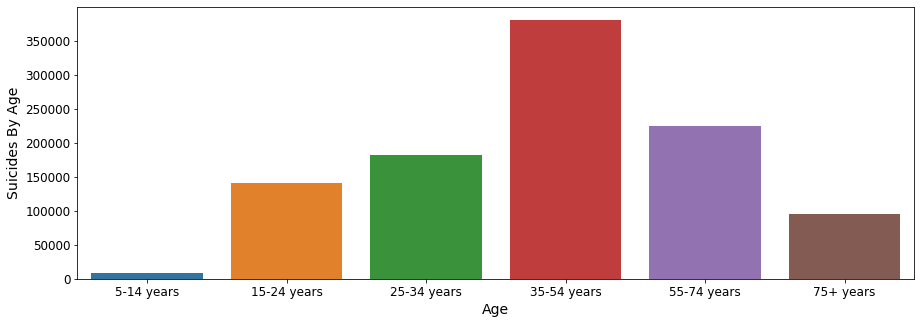

--------------
    country          age  suicides_by_age
276   Japan  15-24 years            52288
277   Japan  25-34 years            94529
278   Japan  35-54 years           278679
279   Japan   5-14 years             2130
280   Japan  55-74 years           272705
281   Japan    75+ years           106571 



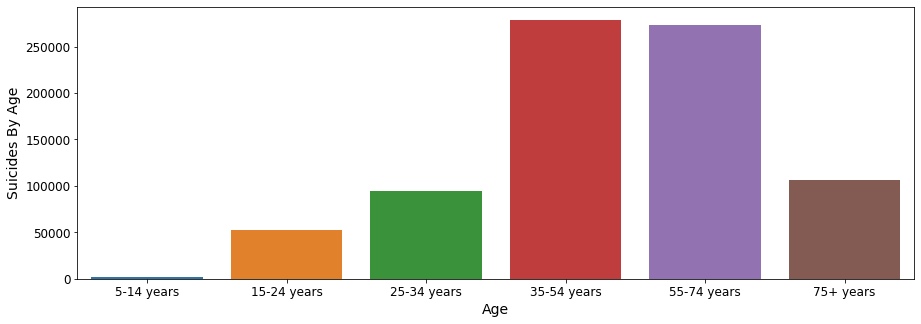

--------------
    country          age  suicides_by_age
198  France  15-24 years            19849
199  France  25-34 years            42510
200  France  35-54 years           123510
201  France   5-14 years              877
202  France  55-74 years            86509
203  France    75+ years            55872 



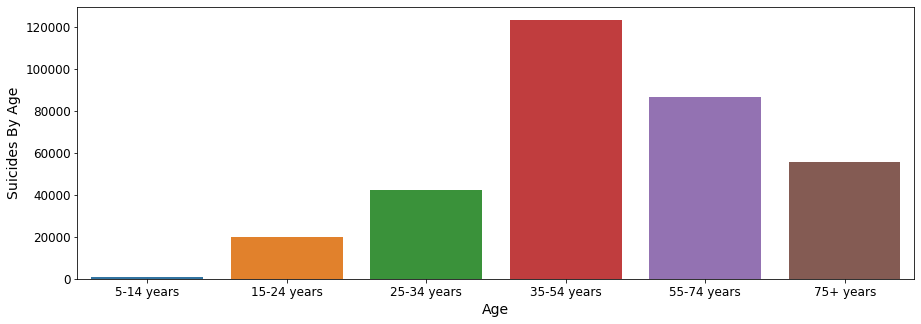

--------------
     country          age  suicides_by_age
569  Ukraine  15-24 years            27509
570  Ukraine  25-34 years            49633
571  Ukraine  35-54 years           124721
572  Ukraine   5-14 years             1949
573  Ukraine  55-74 years            90385
574  Ukraine    75+ years            25753 



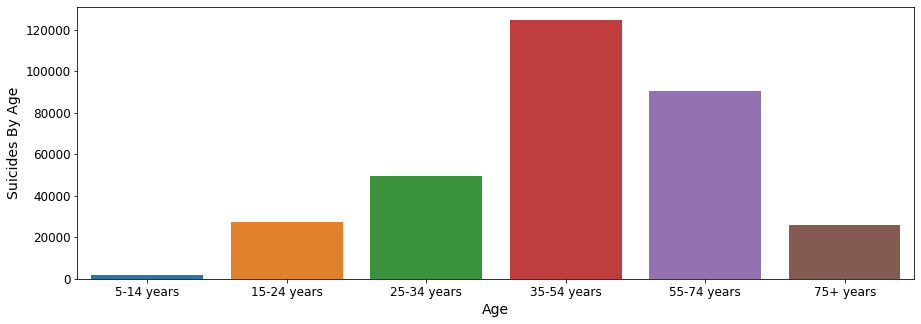

--------------
     country          age  suicides_by_age
210  Germany  15-24 years            17902
211  Germany  25-34 years            32947
212  Germany  35-54 years            97833
213  Germany   5-14 years              832
214  Germany  55-74 years            89191
215  Germany    75+ years            52557 



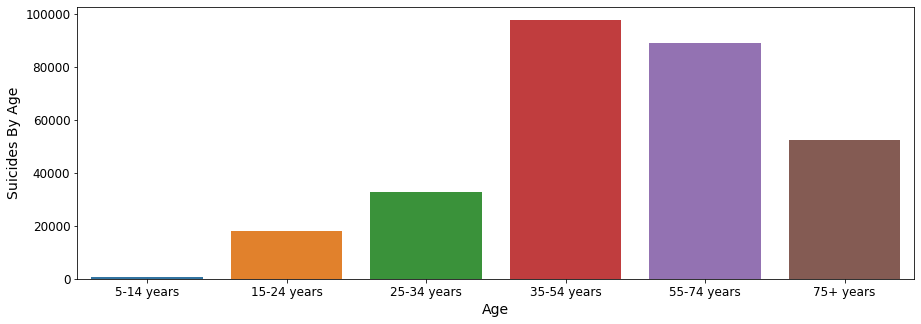

--------------


In [ ]:
# Grouping the total number of suicides per age group by country
df_age = df.groupby(['country', 'age'])['suicides_no'].sum().reset_index(name ='suicides_by_age')

for country in df_year_grouped[0:6]['country']:
    
    # Picking out picking country records from the dataframe
    top_age_suicides = df_age.loc[df_age['country'] == country]
    
    print(top_age_suicides, '\n')

    # Setting the figure size
    plt.figure(figsize = (15, 5))
    
    sb.barplot(x = top_age_suicides['age'], y = top_age_suicides['suicides_by_age'], order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])
    
    # Setting various axis parameters
    plt.tick_params(axis='x', which='major', labelsize=12)
        
    plt.xlabel("Age", fontsize = 14)
    
    plt.tick_params(axis='y', which='major', labelsize=12)
        
    plt.ylabel("Suicides By Age", fontsize = 14)

    plt.show()
    
    print("--------------")

From all the plots, it's evident that for all countries, the most number of suicides are commited by people in the age range of 35-54 years which might a period of increased anxiety for everyone regardless of the country they lived in. Further, the least number of suicides in all cases, is, as expected from the age group of 5-14 years. Further, all countries in general follow the pattern of a rising number of suicides starting from the range of 5-14 years, peaking at 35-54 years and further declining from there.

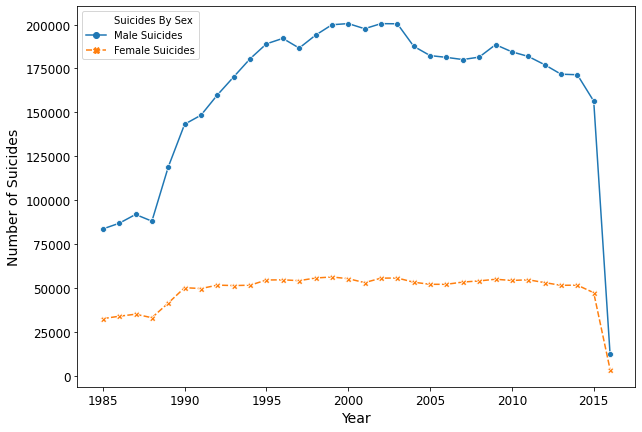

In [ ]:
# Grouping the total number of suicides per year by sex
df_sex = df.groupby(['year', 'sex'])['suicides_no'].sum().reset_index(name ='suicides_by_sex')

# Getting records pertaining to male suicides
df_male = df_sex.loc[df_sex['sex'] == 'male']

# Getting records pertaining to male suicides
df_female = df_sex.loc[df_sex['sex'] == 'female']

# Creating a new dataframe with suicides arranged with respect to sexes as columns
data_preproc = pd.DataFrame({'Year': df_sex['year'], 'Male Suicides': df_male['suicides_by_sex'], 'Female Suicides': df_female['suicides_by_sex']})

# Setting the figure size
plt.figure(figsize = (10, 7))

# Plotting a line plot
sb.lineplot(x = 'Year', y= 'Number of Suicides', hue= 'Suicides By Sex', style='Suicides By Sex', markers=True, data = pd.melt(data_preproc, ['Year'], var_name = 'Suicides By Sex', value_name = 'Number of Suicides'))

# Setting various axis parameters
plt.tick_params(axis='x', which='major', labelsize=12)
        
plt.xlabel("Year", fontsize = 14)
    
plt.tick_params(axis='y', which='major', labelsize=12)
        
plt.ylabel("Number of Suicides", fontsize = 14)

plt.show()

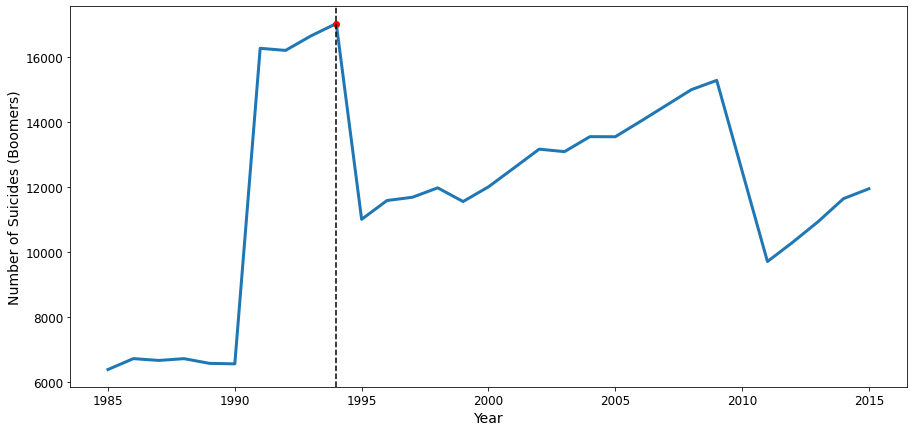

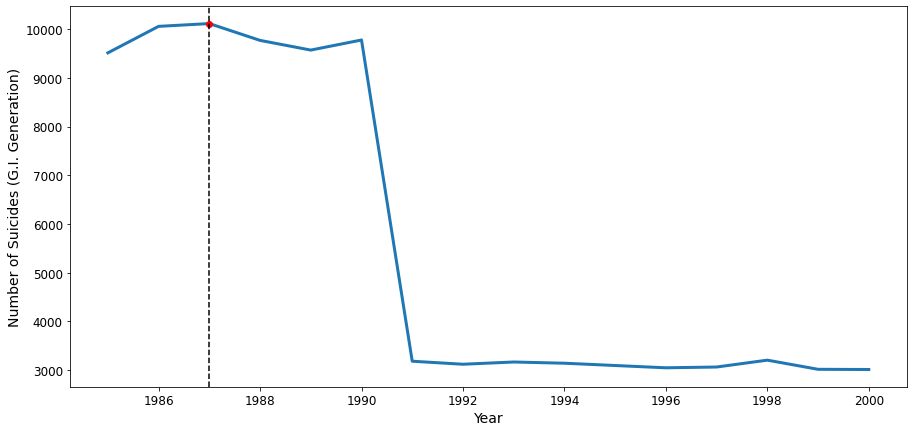

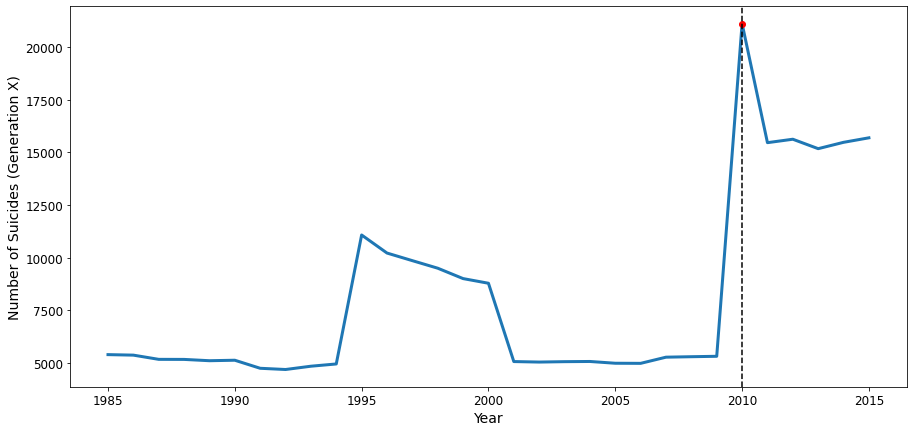

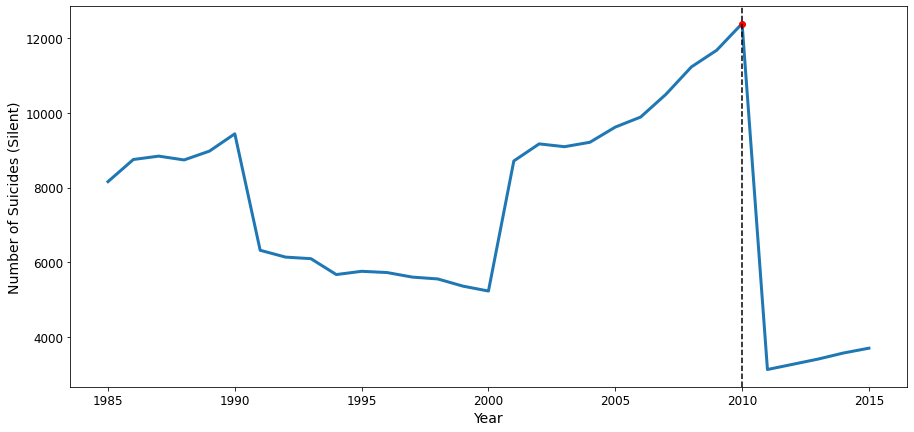

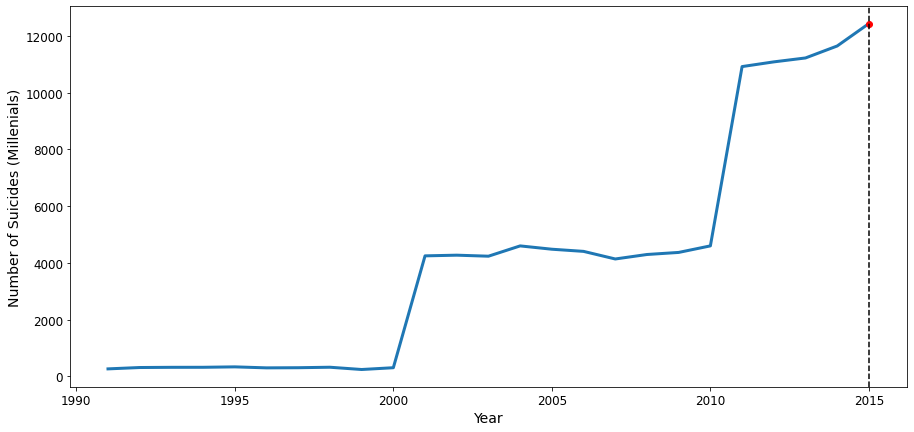

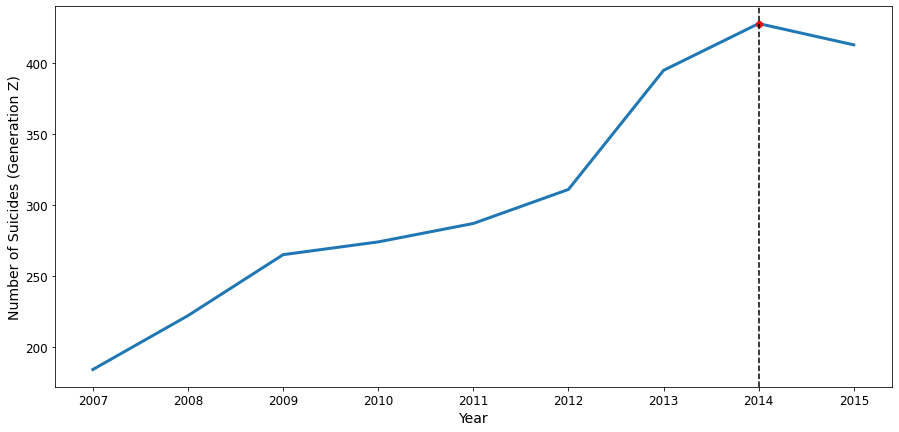

In [ ]:
# Getting all records pertaining to the US
df_US = df.loc[df['country'] == 'United States']

# Grouping the total number of suicides per year by generation for the US
df_US_gen = df_US.groupby(['year', 'generation'])['suicides_no'].sum().reset_index(name ='suicides_by_gen')

for col in pd.unique(df_US_gen['generation']):

    # Getting records specific to each generation
    df_new = df_US_gen.loc[df_US_gen['generation'] == col]

    # Getting the maximum value of the number of suicides
    max_val = df_new['suicides_by_gen'].max()

    # Getting the record corresponding to the maximum value of the number of suicides
    df_max_record = df_new.loc[df_new.suicides_by_gen == max_val]
    
    # Setting the figure size
    plt.figure(figsize = (15, 7))
    
    # Plotting a line plot
    sb.lineplot(x = df_new['year'], y = df_new['suicides_by_gen'], lw=3)
    
    # Setting various axis parameters
    plt.tick_params(axis='x', which='major', labelsize=12)
    
    plt.xlabel("Year", fontsize = 14)
    
    plt.tick_params(axis='y', which='major', labelsize=12)
    
    plt.ylabel("Number of Suicides ({})".format(col), fontsize = 14)

    # Plotting a point to highlight the maximum number of suicides for the particular generation
    plt.plot(df_max_record['year'], df_max_record['suicides_by_gen'], 'ro')

    # Drawing a vertical line through highighted point for better visibility
    plt.axvline(x = int(df_max_record['year']), color='k', linestyle='--')
    
    plt.show()

In [ ]:
import scipy

# A function to plot bi-histograms
def bihist(y1, y2):
    
    # Setting the figure size
    h = plt.figure(figsize=(10, 7)).add_subplot(111)

    # Setting up the two histograms
    n1, bins1, patch1 = h.hist(y1.age, weights=y1.population_by_age_sex, bins=len(y1.age), align = 'mid', rwidth = 0.8)
    n2, bins2, patch2 = h.hist(y2.age, weights=y2.population_by_age_sex, bins=len(y2.age), align = 'mid', rwidth = 0.8)

    # set ymax:
    ymax = 0
    for i in patch1:
        height = i.get_height()
        if height > ymax: 
            ymax = height
        
    # invert second histogram and set ymin:
    ymin = 0
        
    for i in patch2:
                
        height = i.get_height()
        height = -height
        i.set_height(height)
    
        if height < ymin: 
            ymin = height

    # Setting various axis parameters
    plt.tick_params(axis='x', which='major', labelsize=12)
    
    plt.xlabel("Age", fontsize = 14)
    
    plt.tick_params(axis='y', which='major', labelsize=12)
    
    plt.ylabel("Population", fontsize = 14)

    plt.axhline(y=0, color='k', linestyle='--')
    
    # Setting y-axis limits
    h.set_ylim(ymin*1.1, ymax*1.1)          
    h.figure.canvas.draw()
    plt.show()

Male vs Female Population Bihistogram for Russian Federation is:



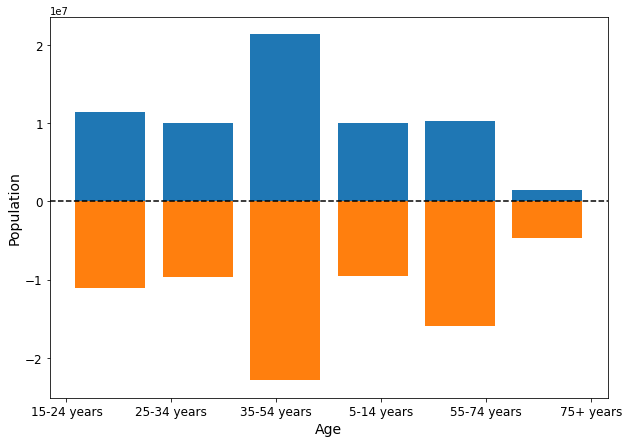

Male vs Female Population Bihistogram for United States is:



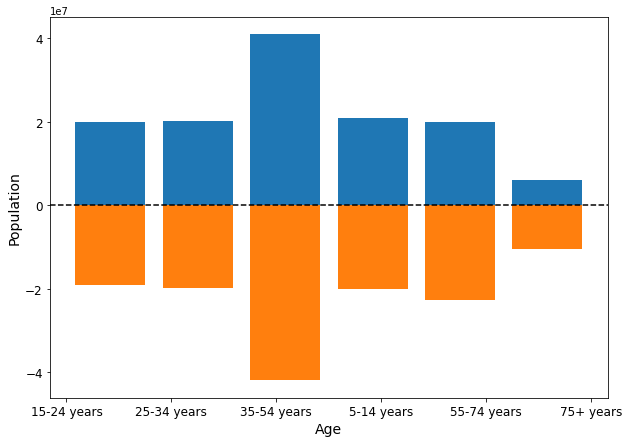

Male vs Female Population Bihistogram for Japan is:



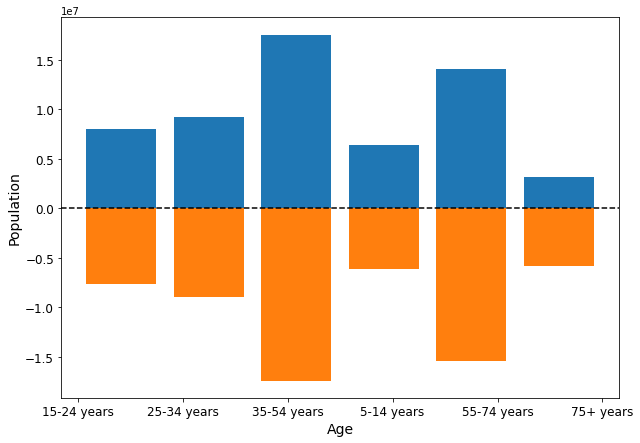

Male vs Female Population Bihistogram for France is:



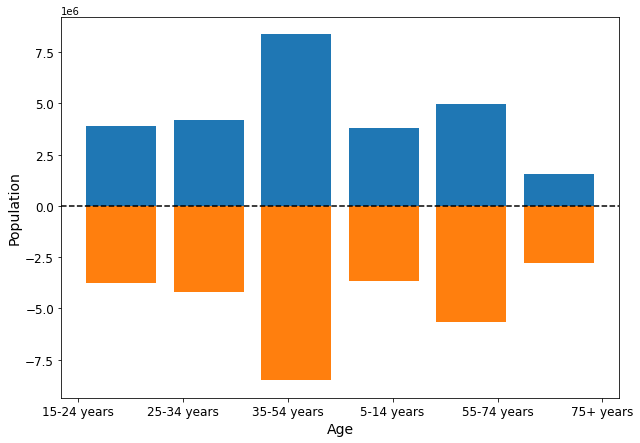

Male vs Female Population Bihistogram for Ukraine is:



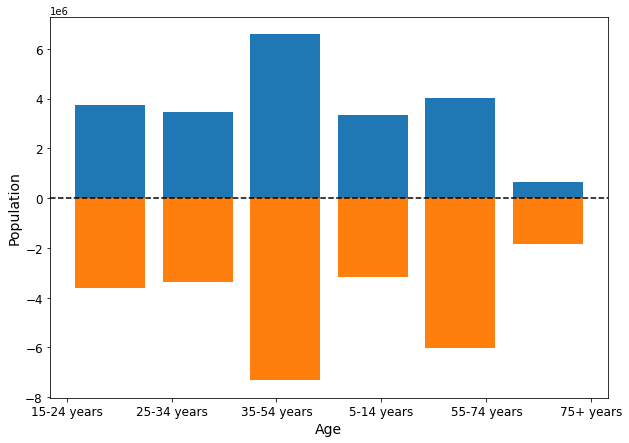

Male vs Female Population Bihistogram for Germany is:



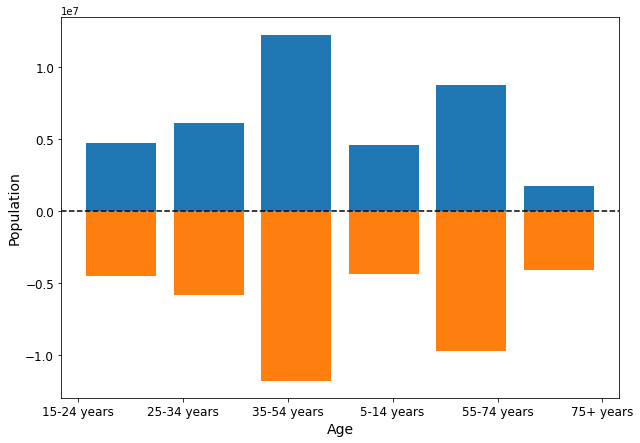

In [ ]:
for country in df_year_grouped[0:6]['country']:

    # Selecting data from the year 2000 from each of the top 6 countries
    df_2000 = df.loc[(df['year'] == 2000) & (df['country'] == country)]
    
    # Grouping the total population of the country by age and sex
    df_2000_grouped = df_2000.groupby(['age', 'sex'])['population'].sum().reset_index(name ='population_by_age_sex')

    # Isolating the male and female populations seperately
    df_male = df_2000_grouped.loc[df_2000_grouped['sex'] == 'male']
    df_female = df_2000_grouped.loc[df_2000_grouped['sex'] == 'female']

    print("Male vs Female Population Bihistogram for {} during the year 2000 is:\n".format(country))
    bihist(df_male, df_female)

In [ ]:
# Dropping all the records with missing HDI values
df_hdi = df.dropna(axis = 0, how = 'any')

# Grouping the suicides per 100k and population by the HDI values per year for each country
df_hdi_grouped = df_hdi.groupby(['country', 'year', 'HDI for year'])['suicides/100k pop', 'population'].sum()

df_hdi_grouped.reset_index(inplace=True)

# Averaging out the HDI values, population and suicides/100k values per year
df_avg_hdi_grouped = df_hdi_grouped.groupby(['country'])['HDI for year', 'suicides/100k pop', 'population'].mean()

df_avg_hdi_grouped.reset_index(inplace=True)

# Applying a log transform to the population to bring it within a reasonable range
df_avg_hdi_grouped['population'] = np.log(df_avg_hdi_grouped['population'])

display(df_avg_hdi_grouped)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,country,HDI for year,suicides/100k pop,population
0,Albania,0.673000,28.227500,14.846829
1,Antigua and Barbuda,0.781667,0.000000,11.405040
2,Argentina,0.779600,120.061000,17.367525
3,Armenia,0.690125,38.957500,14.906090
4,Australia,0.912750,147.330000,16.791957
...,...,...,...,...
85,United Arab Emirates,0.825000,19.380000,15.617234
86,United Kingdom,0.863500,88.264000,17.861908
87,United States,0.891600,166.326000,19.412541
88,Uruguay,0.746556,236.923333,14.923601


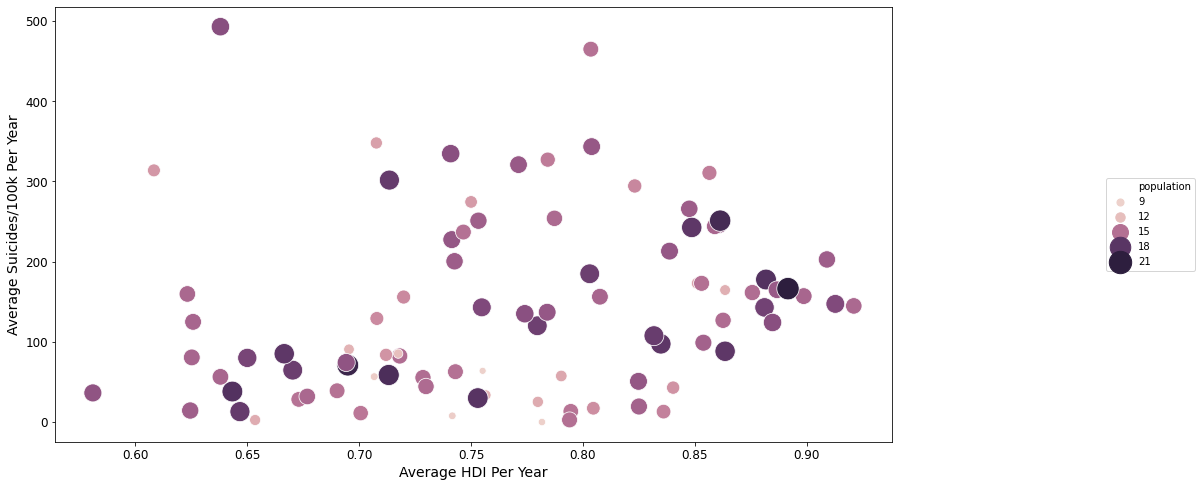

In [ ]:
# Setting the figure size
plt.figure(figsize = (15, 8))

# Plotting a bubble plot of HDI per year vs suicides/100k with population deciding the size of the bubble
bubble = sb.scatterplot(data = df_avg_hdi_grouped, x = 'HDI for year', y = 'suicides/100k pop', hue = 'population', size = 'population', sizes=(50, 500))

# Positioning the legend
bubble.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

# Setting various axis parameters
plt.tick_params(axis='x', which='major', labelsize=12)

# Setting various axis parameters   
plt.xlabel("Average HDI Per Year", fontsize = 14)
    
plt.tick_params(axis='y', which='major', labelsize=12)
    
plt.ylabel("Average Suicides/100k Per Year", fontsize = 14)

plt.show()

An interesting observation that can be drawn from this bubble plot is that as the average HDI index increases, the average suicides/100k population also inceases in general. This is counterintuitive because, an increased HDI signals more prosperity with better facilities and living conditions for all people, and yet the number of suicides for such countries is higher.